ANÁLISIS EXPLORATORIO DE LOS DATOS

In [4]:
# Cargar librerías
import pandas as pd  # Manejo de dataframes

In [7]:
# Cargar datos
df = pd.read_csv("data/df.csv", index_col=0)
df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,target,retirementDate,retirementType,resignationReason
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,...,0,3.0,4.0,2.0,3.0,3.0,0,NaN,No,No
2,31,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,...,4,3.0,2.0,4.0,2.0,4.0,1,2016-10-15,Resignation,Others
3,32,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,...,3,2.0,2.0,1.0,3.0,3.0,0,NaN,No,No
4,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,...,5,4.0,4.0,3.0,2.0,3.0,0,NaN,No,No
5,32,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,...,4,4.0,1.0,3.0,3.0,3.0,0,NaN,No,No


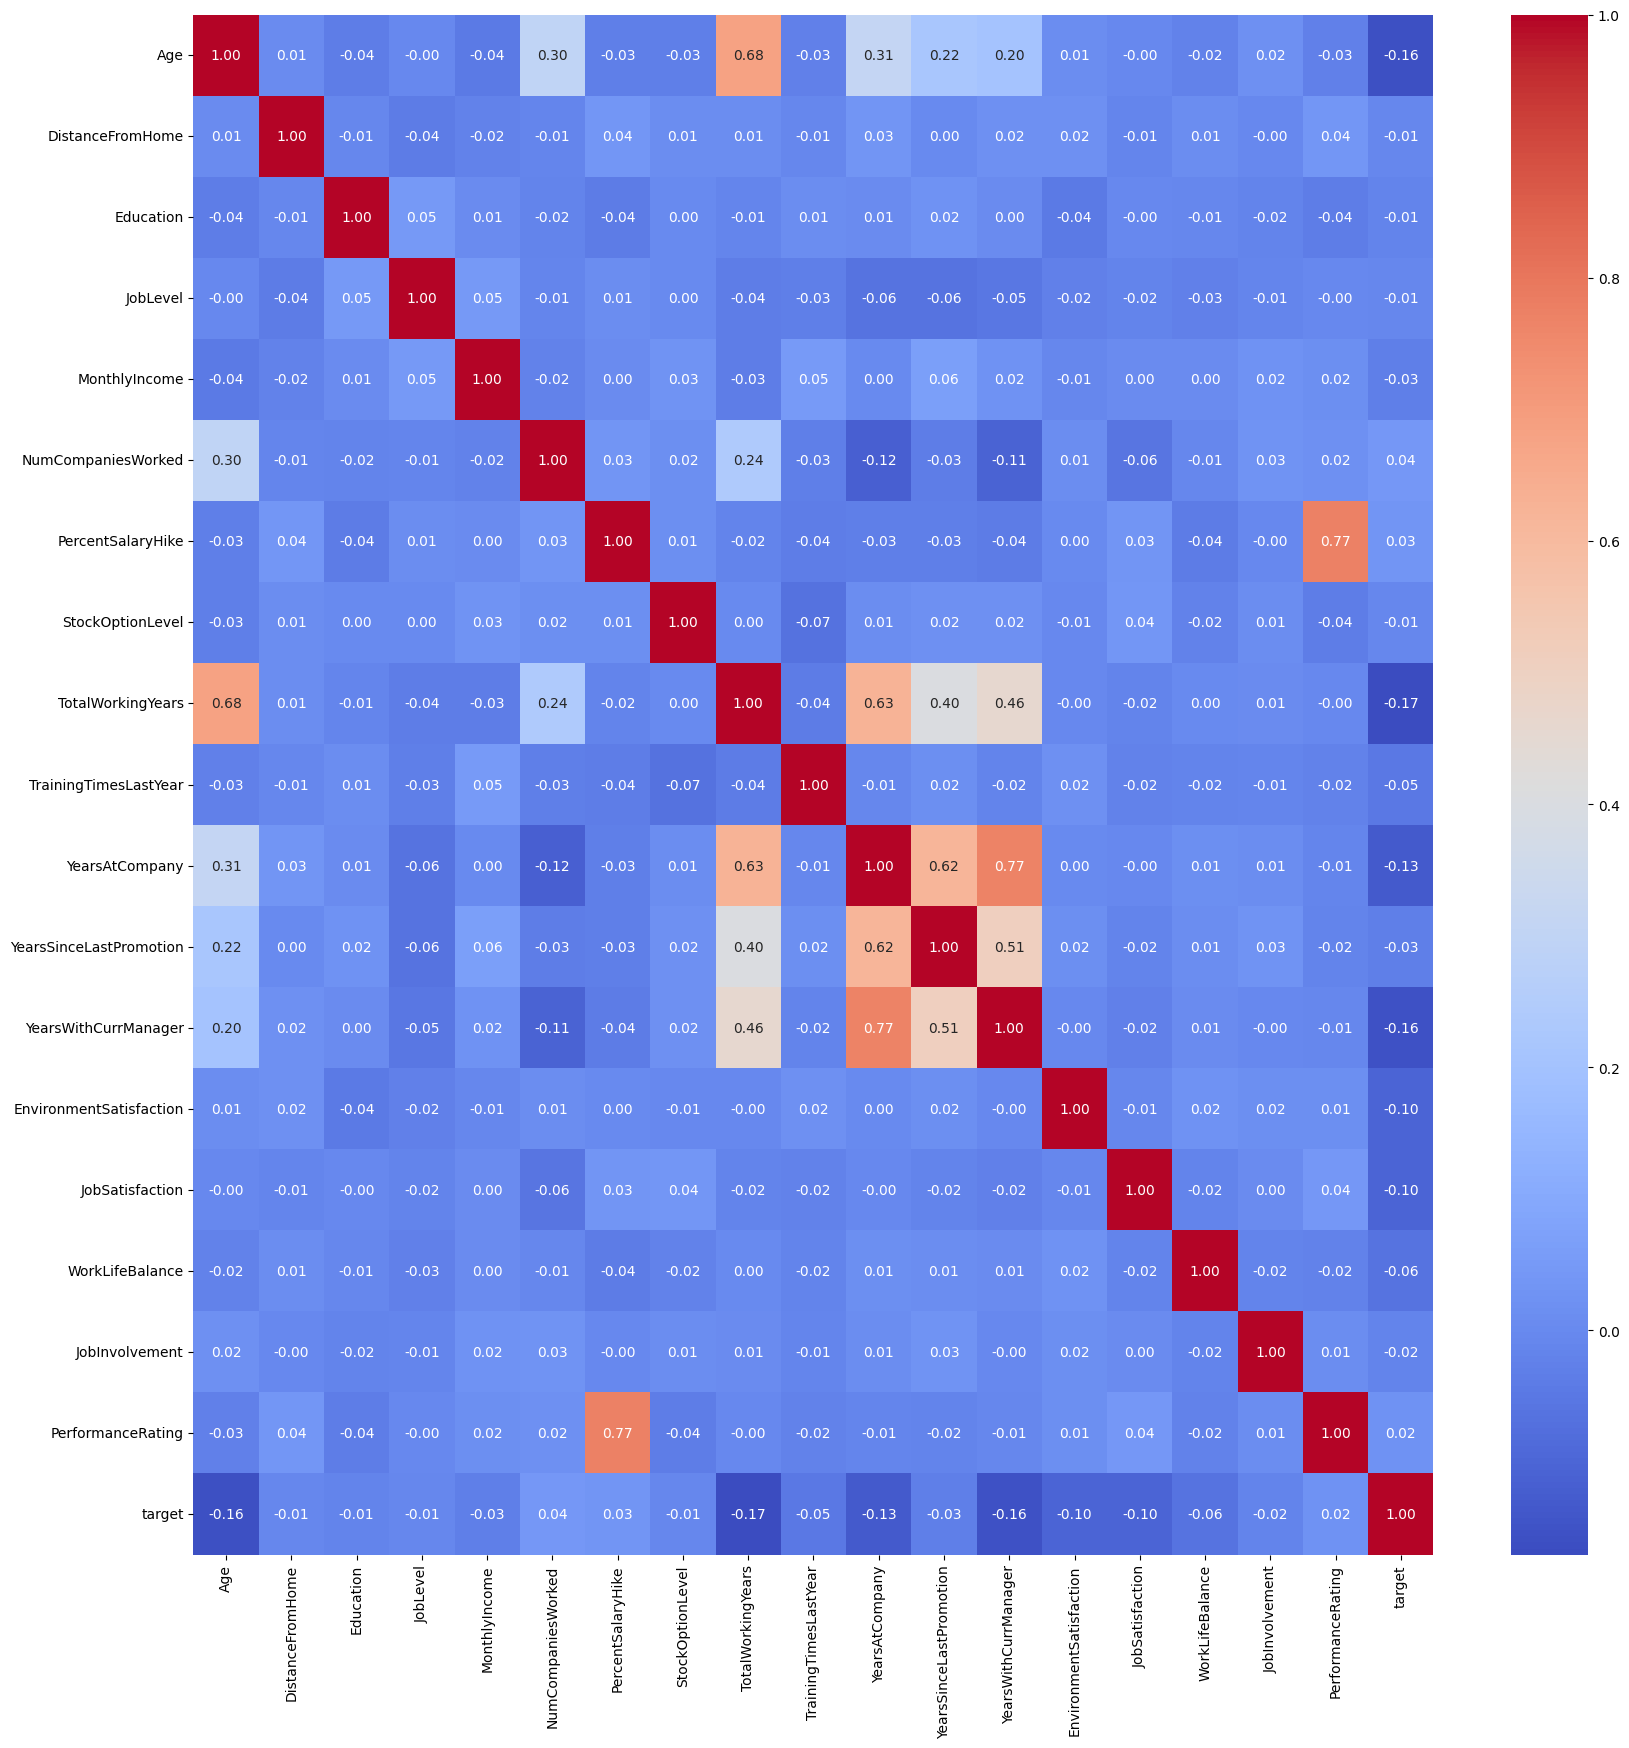

In [8]:
# Matriz de correlación con colores y etiquetas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()